In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
 click <a href="javascript:code_toggle()">here</a> to hide the raw code.''')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import athena_read as ath
import my_athena_read as myath

import os.path
%load_ext autoreload
%autoreload 2
#%reload_ext autoreload

# show binary orbits in 3d

<IPython.core.display.Javascript object>


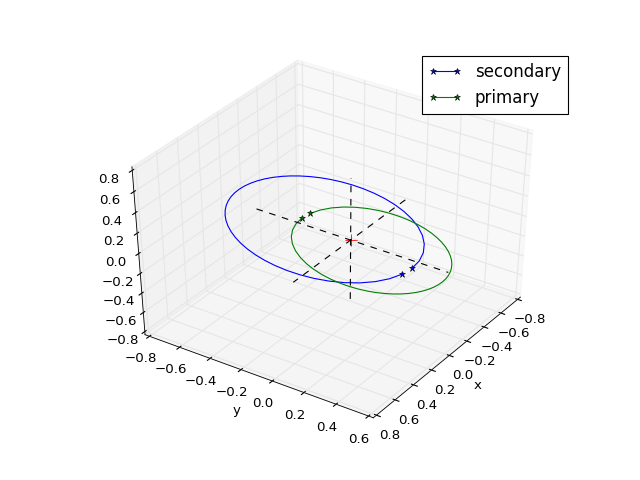

[-0.62269479  0.65139146 -0.62269479  0.65139146 -0.62269479  0.65139146
 -0.62269479  0.65139146]


In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

direname = '/tigress/jiming/athena/bin/binary/'
targname = 'orbit' #m4-tapper'
histname = 'e0.5_q0.1_i0.tab'
histname = 'e0.3_q0.8_i0.2_2.tab'
#histname = 'e0.0_q1_i0.5.tab'
fname=direname+targname+'/'+histname

#fname='/tigress/jiming/athena/bin/test_bin3d/i=0.5/binary_orbit.tab'
torb = 2.*np.pi
dtype1 = np.dtype([('time', 'd'), ('xs1', 'd'),('xs2','d'),('xs3','d'),\
                   ('xp1','d'),('xp2','d'),('xp3','d')])
ahist = np.loadtxt(fname, dtype=dtype1, skiprows=0, usecols=(0,4,5,6,7,8,9))

mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(ahist['xs1'],ahist['xs2'],ahist['xs3'],'b-*',markevery=[0,-1],zdir='z', label='secondary')
ax.plot(ahist['xp1'],ahist['xp2'],ahist['xp3'],'g-*',markevery=[0,-1],zdir='z', label='primary')
ax.legend(fontsize=15)
plt.xlabel('x')
plt.ylabel('y')
# final location
xmin,xmax,ymin,ymax,zmin,zmax=-0.5,0.5,-0.5,0.5,-0.5,0.5
ax.plot([0,0],[0,0],[0,0],'r+',markersize=10)
ax.plot(1.2*np.linspace(xmin,xmax,100),np.zeros(100),np.zeros(100),'k--')
ax.plot(np.zeros(100),1.2*np.linspace(ymin,ymax,100),np.zeros(100),'k--')
ax.plot(np.zeros(100),np.zeros(100),1.2*np.linspace(zmin,zmax,100),'k--')

# # Create cubic bounding box to simulate equal aspect ratio
xmax,ymax,zmax=max(max(ahist['xs1']),max(ahist['xp1'])),\
               max(max(ahist['xs2']),max(ahist['xp2'])),\
               max(max(ahist['xs3']),max(ahist['xp3']))
xmin,ymin,zmin=min(min(ahist['xs1']),min(ahist['xp1'])),\
               min(min(ahist['xs2']),min(ahist['xp2'])),\
               min(min(ahist['xs3']),min(ahist['xp3']))
max_range = np.array([xmax-xmin, ymax-ymin, zmax-zmin]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xmax+xmin)
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ymax+ymin)
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zmax+zmin)
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')
print Zb

plt.grid()
plt.show()

## show the velocity 

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


fname='/tigress/jiming/athena/bin/test_hst1d/debug_vbinary/vbin.tab'
torb = 2.*np.pi
dtype1 = np.dtype([('time', 'd'), ('xs1', 'd'),('xs2','d'),('xs3','d'),\
                   ('xp1','d'),('xp2','d'),('xp3','d'),\
                  ('vs1', 'd'),('vs2','d'),('vs3','d'),\
                   ('vp1','d'),('vp2','d'),('vp3','d')])
ahist = np.loadtxt(fname, dtype=dtype1, skiprows=0, usecols=(0,4,5,6,7,8,9,10,11,12,13,14,15))

<IPython.core.display.Javascript object>


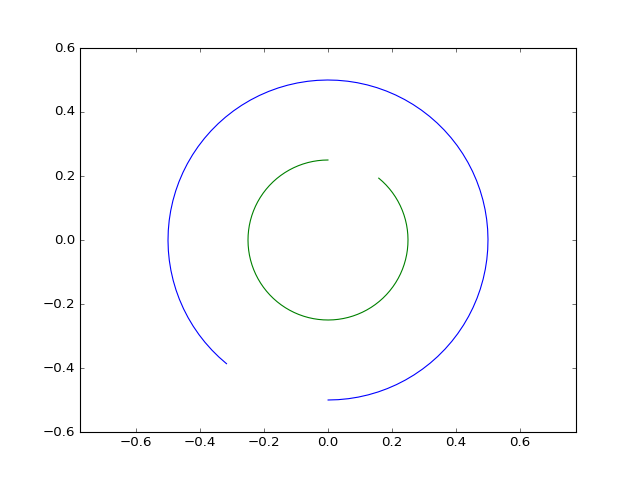

In [11]:
plt.plot(ahist['vp1'],ahist['vp2'])
plt.plot(ahist['vs1']*0.5,ahist['vs2']*0.5)
plt.axes().set_aspect('equal', 'datalim')

## measure $\dot{M}$ by store instantaneous accretion rate from sink cells

* spurious fluctuations due to the dM/dt measurement
* shown are $dot{M}_1$ and after applying various filtering (window size = 3,9 and 19)

<mdot1> =  0.005750889948
<mdot2> =  0.00576586062194


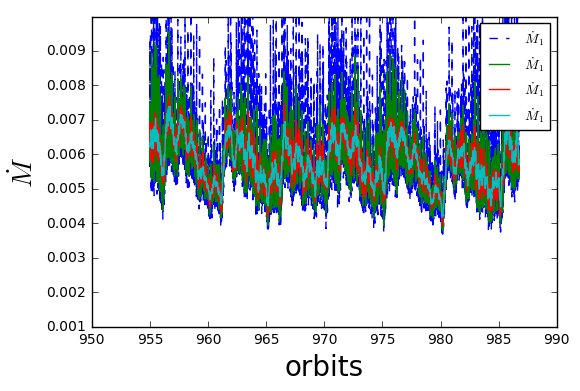

In [233]:
# test the preferential accretion rate 
from read_hist import read_hist1d_mdot
from savgol import savitzky_golay as sg
%matplotlib inline


direname='/tigress/jiming/athena/bin/binary/test_mdot/rsink=0.1.userwork.continue/' #tsink=30/'#rsink=0.1/'
basename='cbd.out1.'
appdname='athdf'
histname='cbd.hst'
plt.subplot(111)
omg=1.0
torb=2.*np.pi/omg

fname=direname+histname
tt,mdot1,mdot2 = read_hist1d_mdot(fname)
plt.plot(tt[::1]/torb,mdot1[::1],'--',label=r'$\dot{M}_1$')
#plt.plot(tt[::10]/torb,mdot2[::10],label=r'$\dot{M}_2$')
plt.plot(sg(tt,3,1)/torb,sg(mdot1,3,1),'-',label=r'$\dot{M}_1$',lw=1)
plt.plot(sg(tt,9,1)/torb,sg(mdot1,9,1),'-',label=r'$\dot{M}_1$',lw=1)
plt.plot(sg(tt,19,1)/torb,sg(mdot1,19,1),'-',label=r'$\dot{M}_1$',lw=1)
#plt.plot(sg(tt[::10],9,1)/torb,sg(mdot2[::10],9,1),'-',label=r'$\dot{M}_1$',lw=2)

size=int(len(mdot1)*0.2)

print '<mdot1> = ',np.average(mdot1[size:])
print '<mdot2> = ',np.average(mdot2[size:])
   
plt.ylim([1e-3,1.e-2])
#plt.xlim([900,910])
# plt.xticks(np.arange(0, 51, 1.0))
plt.xlabel('orbits',fontsize=20)
plt.ylabel(r'$\dot{M}$',fontsize=20)
plt.legend(fontsize=10,loc=1)
#plt.savefig('alpha_t.png', format='png', dpi=300)

## measure $\dot{M}$ by store mass increment from sink cells
* get rid of the spurious fluctuations, and results similar to above (after filtering out high frequency signals)

<mdot1> =  0.00584024914246
<mdot2> =  0.0058337967556


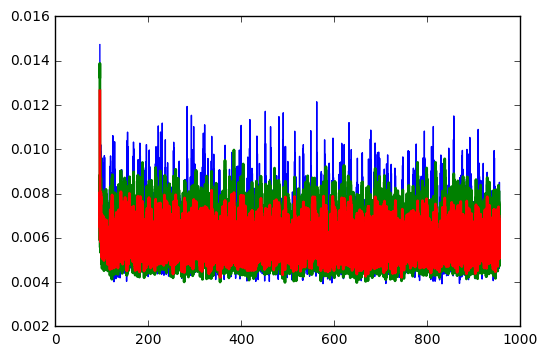

In [36]:
# test the preferential accretion rate 
from read_hist import read_hist1d_mdot
from savgol import savitzky_golay as sg
%matplotlib inline

direname='/tigress/jiming/athena/bin/binary/test_mdot/rsink=0.1.userwork/'#.mass/'
basename='cbd.out1.'
appdname='athdf'
histname='cbd.hst'

omg=1.0
torb=2.*np.pi/omg
dt = 0.01*torb
plt.subplot(111)
fname=direname+histname
tt,mdot1,mdot2 = read_hist1d_mdot(fname)

# calc mdot with accumulated mass
# mdot1 = np.gradient(mdot1[::1])/dt
# mdot2 = np.gradient(mdot2[::1])/dt
# plt.plot(tt[::1]/torb,mdot1,'-',label=r'$\dot{M}_1$')
# plt.plot(tt[::1]/torb,mdot2,'-',label=r'$\dot{M}_2$')

plt.plot(tt[::10]/torb,mdot2[::10],label=r'$\dot{M}_2$')
plt.plot(sg(tt,3,1)/torb,sg(mdot1,3,1),'-',label=r'$\dot{M}_1$',lw=2)
plt.plot(sg(tt,19,1)/torb,sg(mdot1,9,1),'-',label=r'$\dot{M}_1$',lw=2)

#plt.plot(sg(tt,19,2)/torb,sg(mdot2,19,2),label=r'$\dot{M}_2$')
#plt.xlim([956,959])
#plt.ylim([1e-3,1.e-2])
size=int(len(mdot1)*0.2)
print '<mdot1> = ',np.average(mdot1[size:])
print '<mdot2> = ',np.average(mdot2[size:])

## 2D $256^2$ + $2$ level refinement:

(32414,)
0.00790923566879 0.00779140127388
16207

<mdot1> =  0.0061151646159
<mdot2> =  0.00614021497945


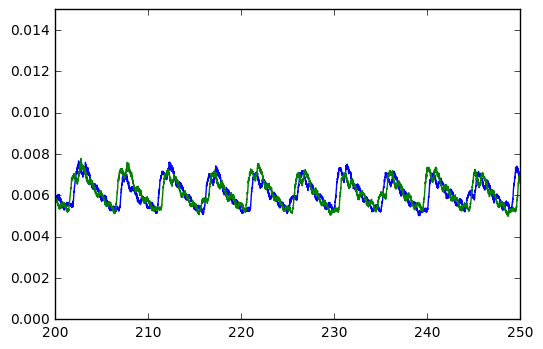

In [273]:
# test the preferential accretion rate 
from read_hist import read_hist1d_mdot
from savgol import savitzky_golay as sg
%matplotlib inline

direname='/tigress/jiming/athena/bin/test_hst1d/2d.hole/'
basename='cbd.out1.'
appdname='athdf'
histname='cbd.hst'
#histname='cbd.hst'

omg=1.0
torb=2.*np.pi/omg
dt = 0.0628 # 0.01*torb
plt.subplot(111)
fname=direname+histname
tt,mdot1,mdot2 = read_hist1d_mdot(fname)

print mdot1.shape
#plt.plot(tt/torb,mdot1)
#plt.plot(tt/torb,mdot2)

#mdot1 = np.gradient(mdot1[::1])/dt
#mdot2 = np.gradient(mdot2[::1])/dt
mdot1 = np.gradient(mdot1,dt)
mdot2 = np.gradient(mdot2,dt)
mdot1[mdot1<0.0] = 0.0008
mdot2[mdot2<0.0] = 0.0008
print np.max(mdot1),np.max(mdot2)
plt.plot(tt/torb,mdot1,'b-',label=r'$\dot{M}_1$')
plt.plot(tt/torb,mdot2,'g-',label=r'$\dot{M}_2$')
#plt.plot(sg(tt,89,1)/torb,sg(mdot1,89,1),'r-',label=r'$\dot{M}_1$',lw=2)
#plt.plot(sg(tt,89,1)/torb,sg(mdot2,89,1),'y-',label=r'$\dot{M}_2$',lw=2)

#plt.xlim([600,620])
plt.ylim([0,1.5e-2])
size=int(len(mdot1)*0.5)
print size
print 
print '<mdot1> = ',np.average(mdot1[size:])
print '<mdot2> = ',np.average(mdot2[size:])


###########
# direname='/tigress/jiming/athena/bin/test_bin3d/i=0.5/' 
# tt,mdot1,mdot2 = read_hist1d_mdot(fname)
# mdot1 = np.gradient(mdot1[::1])/dt
# mdot2 = np.gradient(mdot2[::1])/dt
# plt.plot(tt[::1]/torb,mdot1,'-',label=r'$\dot{M}_1$')
# plt.plot(tt[::1]/torb,mdot2,'-',label=r'$\dot{M}_2$')

## accretion history from 3d low-res $64^3$+2 level
* it takes a while (<~80 orbits to recover the inflow equilibrium
* at the stead accretion state $t=100$-$200$, the total mdot of binary matches the inflow rate set at outer disk which is $\dot{M}_{out} = 3\pi \nu \Sigma(r_{out})\sim 9.42\times 10^{-3} \alpha_{-1} h^2_{-1}\Sigma_0$, which is $\sim 0.01$ for 2D runs, while it is $1.88\times 10^{-3}$ for 3D runs. Our results match both 2d and 3D predictions within $10\%$
* there are temporal modulations at $t_{bin}$ , $\sim 5 t_{bin}$ (disk gap edge), and $\sim 30 t_{bin}$ (quarter of full precession!! suspicious!! peak when longitude of perapse lined up with grid while trough when it is diagonal to the grid structure!!! Maybe higher resolution could better, for now, its 10a/64) 
* the precession rate is $\sim 1.3\times 10^{-3}$ matches the linear perturbation theory $\sim \Omega-\kappa$ at radius $r=4a$

(20063,)
0.00169808917197 0.00170103503185
10031

<mdot1> =  0.000982749479135
<mdot2> =  0.000977984690948


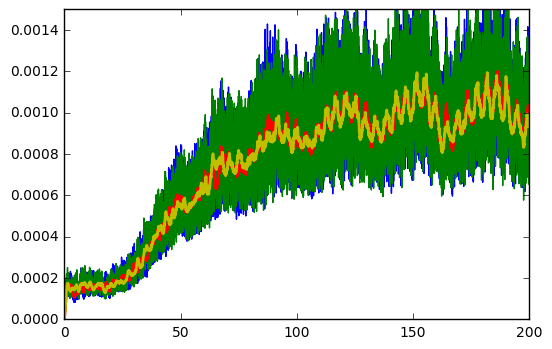

In [81]:
# test the preferential accretion rate 
from read_hist import read_hist1d_mdot
from savgol import savitzky_golay as sg
%matplotlib inline

direname='/tigress/jiming/athena/bin/test_bin3d/i=0_256lev3/'
direname='/tigress/jiming/athena/bin/test_diod/'
basename='tilt.out1.'
appdname='athdf'
histname='tilt.hst'
#histname='cbd.hst'

omg=1.0
torb=2.*np.pi/omg
dt = 0.0628 # 0.01*torb
plt.subplot(111)
fname=direname+histname
tt,mdot1,mdot2 = read_hist1d_mdot(fname)

print mdot1.shape
#plt.plot(tt/torb,mdot1)
#plt.plot(tt/torb,mdot2)

#mdot1 = np.gradient(mdot1[::1])/dt
#mdot2 = np.gradient(mdot2[::1])/dt
mdot1 = np.gradient(mdot1,dt)
mdot2 = np.gradient(mdot2,dt)
mdot1[mdot1<0.0] = 0.0008
mdot2[mdot2<0.0] = 0.0008
print np.max(mdot1),np.max(mdot2)
plt.plot(tt/torb,mdot1,'b-',label=r'$\dot{M}_1$')
plt.plot(tt/torb,mdot2,'g-',label=r'$\dot{M}_2$')
#plt.plot(tt[::10]/torb,mdot2[::10],label=r'$\dot{M}_2$')
#plt.plot(sg(tt,3,1)/torb,sg(mdot1,3,1),'-',label=r'$\dot{M}_1$',lw=2)
plt.plot(sg(tt,89,1)/torb,sg(mdot1,89,1),'r-',label=r'$\dot{M}_1$',lw=2)
plt.plot(sg(tt,89,1)/torb,sg(mdot2,89,1),'y-',label=r'$\dot{M}_2$',lw=2)

plt.xlim([0,200])
plt.ylim([0,1.5e-3])
size=int(len(mdot1)*0.5)
print size
print 
print '<mdot1> = ',np.average(mdot1[size:])
print '<mdot2> = ',np.average(mdot2[size:])


###########
# direname='/tigress/jiming/athena/bin/test_bin3d/i=0.5/' 
# tt,mdot1,mdot2 = read_hist1d_mdot(fname)
# mdot1 = np.gradient(mdot1[::1])/dt
# mdot2 = np.gradient(mdot2[::1])/dt
# plt.plot(tt[::1]/torb,mdot1,'-',label=r'$\dot{M}_1$')
# plt.plot(tt[::1]/torb,mdot2,'-',label=r'$\dot{M}_2$')

## calc the binary torque etc.

the output data structure:
*  cbd[nvar*ntime, nrad]  where nvar=0-3 corresponds to shell integrated binary torque, mdot,  [beta (tilt), and gamma (twist,precession)]
*  csd1, csd2 are similar to cbd, but centers on primary and secondary

In [3]:
# test the hist1d dump
import numpy as np

def read_hist1d_binary(path):

    # read radii
    dtype = np.dtype("f4")
    fname = path+'/rcbd.hst1d'
    rcbd = np.fromfile(fname, dtype=dtype,count=-1)
    ncbd = rcbd.shape[0]/2

    fname = path+'/rcsd1.hst1d'
    rcsd1 = np.fromfile(fname, dtype=dtype,count=-1)
    ncsd1 = rcsd1.shape[0]/2
    
    fname = path+'/rcsd2.hst1d'
    rcsd2 = np.fromfile(fname, dtype=dtype,count=-1)
    ncsd2 = rcsd2.shape[0]/2

    # read data
    dtype = np.dtype(str(ncsd1)+"f4")
    fname = path+'/csd1.hst1d'
    csd1 = np.fromfile(fname, dtype=dtype,count=-1)

    dtype = np.dtype(str(ncsd2)+"f4")
    fname = path+'/csd2.hst1d'
    csd2 = np.fromfile(fname, dtype=dtype,count=-1)

    fname = path+'/cbd.hst1d'
    dtype = np.dtype(str(ncbd)+"f4")
    cbd = np.fromfile(fname, dtype=dtype,count=-1)

    fname = path+'/time.hst1d'
    dtype = np.dtype("f4")
    time = np.fromfile(fname, dtype=dtype,count=-1)
    
    return time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2




# DEBUG


In [95]:
path = '/tigress/jiming/athena/bin/test_hst1d/debug_hires'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape

(50,) (4790, 25) (4790, 256) (512,)


(-0.2, 0.2)

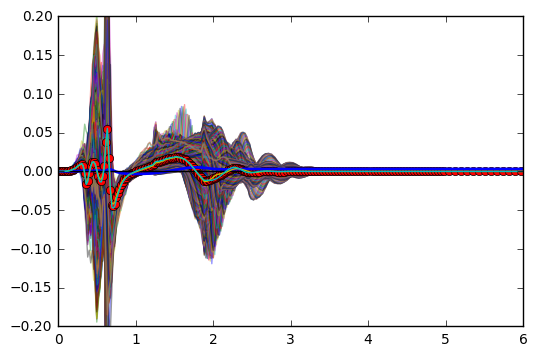

In [97]:
%matplotlib inline
from scipy import integrate
nvar=5
nt = cbd.shape[0]//nvar
nrcbd = cbd.shape[1]
for i in np.arange(0,nt):
  plt.plot(rcbd[0:nrcbd],cbd[nvar*i,:],alpha=0.4)

dtdr = np.average(cbd[0:-1:nvar,:],axis=0)#/rcbd[0:nrcbd]

dtdr_first_half = np.average(cbd[0:(nt/2)*nvar:5,:],axis=0)
dtdr_second_half = np.average(cbd[(nt/2)*nvar:-1:5,:],axis=0)

torq = integrate.cumtrapz(dtdr, rcbd[0:nrcbd], initial=0)
#torq = np.cumsum(dtdr*rcbd[32:])
plt.plot(rcbd[0:nrcbd],dtdr,'r-o',lw=2)
plt.plot(rcbd[0:nrcbd],torq,'b-',lw=2)
plt.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))
plt.plot(rcbd[0:nrcbd],dtdr_first_half,'y-',lw=1)
plt.plot(rcbd[0:nrcbd],dtdr_second_half,'c-',lw=1)

plt.xlim([0,6])
plt.ylim([-2e-1,2e-1])
#print torq

avg(mdot0)= -0.0094932
avg(mdot1)= -0.00118808
avg(mdot2)= -0.00123564


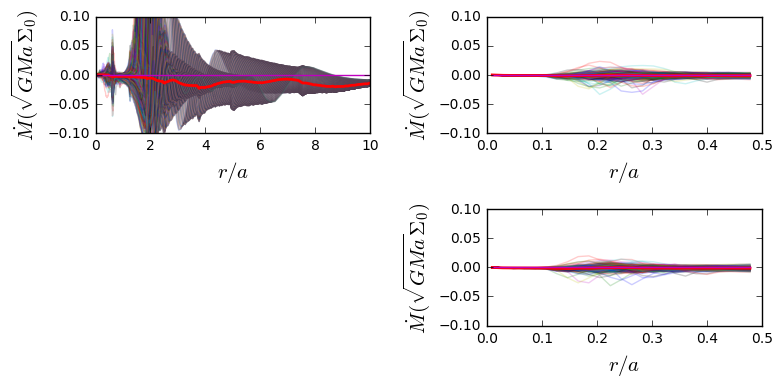

In [98]:
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(2, 2) 

# plot cbd mdot
ax0 = plt.subplot(gs[0:1,0])
nrcbd = cbd.shape[1]
for i in np.arange(0,nt/3):
  ax0.plot(rcbd[0:nrcbd],cbd[3*nvar*i+1,:],alpha=0.2)
mdot = np.average(cbd[1:-1:nvar,:],axis=0)
ax0.plot(rcbd[0:nrcbd],mdot,'r-',lw=2)
ax0.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))
print "avg(mdot0)=",np.average(mdot)
#plt.xlim([0,6])
ax0.set_ylim([-1e-1,1e-1])
ax0.set_xlabel(r'$r / a$',fontsize=15)
ax0.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

#plot csd1 mdot
ax1 = plt.subplot(gs[0,1])
nrcsd1 = csd1.shape[1]
for i in np.arange(0,nt/3):
  ax1.plot(rcsd1[0:nrcsd1],csd1[3*nvar*i+1,:],alpha=0.2)
mdot = np.average(csd1[1:-1:nvar,:],axis=0)
ax1.plot(rcsd1[0:nrcsd1],mdot,'r-',lw=2)
ax1.plot(rcsd1[0:nrcsd1],np.full(nrcsd1,0.0))
print "avg(mdot1)=",np.average(mdot)
ax1.set_ylim([-1e-1,1e-1])
ax1.set_xlabel(r'$r / a$',fontsize=15)
ax1.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)


#plot csd2 mdot
ax2 = plt.subplot(gs[1,1])
nrcsd2 = csd2.shape[1]
for i in np.arange(0,nt/3):
  ax2.plot(rcsd2[0:nrcsd1],csd2[3*nvar*i+1,:],alpha=0.2)
mdot = np.average(csd2[1:-1:nvar,:],axis=0)
ax2.plot(rcsd1[0:nrcsd2],mdot,'r-',lw=2)
ax2.plot(rcsd1[0:nrcsd2],np.full(nrcsd2,0.0))
print "avg(mdot2)=",np.average(mdot)
ax2.set_ylim([-1e-1,1e-1])
ax2.set_xlabel(r'$r / a$',fontsize=15)
ax2.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

plt.tight_layout()


(4790, 256)


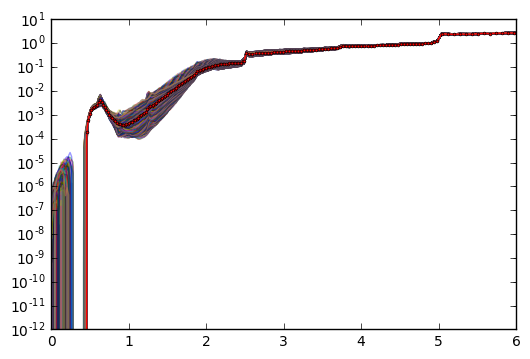

In [101]:
%matplotlib inline
from scipy import integrate
nvar=5
nt = cbd.shape[0]//nvar
print cbd.shape
nrcbd = cbd.shape[1]
for i in np.arange(0,nt):
  plt.plot(rcbd[0:nrcbd],cbd[4+nvar*i,:],alpha=0.4)

dj = np.average(cbd[4:-1:nvar,:],axis=0)
# torq = integrate.cumtrapz(dtdr, rcbd[0:nrcbd], initial=0)
# #torq = np.cumsum(dtdr*rcbd[32:])
plt.plot(rcbd[0:nrcbd],dj,'r-o',lw=1,markersize=2)
# plt.plot(rcbd[0:nrcbd],torq,'b-',lw=2)
# plt.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))

plt.xlim([0,6])
plt.yscale('log')
#plt.ylim([-2e-1,2e-1])
#print torq

## New hst1d output:   torque,mdot,Ld_x,Ld_y, and Ld_z

In [24]:
from matplotlib import gridspec
%matplotlib inline

def plot_mdot_3panel(mcbd,mcsd1,mcsd2,rmcbd,rmcsd1,rmcsd2):
    
    fig = plt.figure(figsize=(8, 4)) 
    gs = gridspec.GridSpec(2, 2) 
    # plot cbd mdot
    ax0 = plt.subplot(gs[:,0])
    nt,nr = mcbd.shape
    for i in np.arange(0,nt/10):
      ax0.plot(rmcbd,mcbd[i*10,:],alpha=0.2)
    mdot = np.average(mcbd,axis=0)
    ax0.plot(rmcbd,mdot,'r-',lw=2)
    ax0.plot(rmcbd,np.full(nr,0.0))
    print "avg(mdot0)=",np.average(mdot[np.logical_and(rmcbd>=1,rmcbd<=8)])
    plt.xlim([0,10])
    ax0.set_ylim([-2e-2,5e-3])
    ax0.set_xlabel(r'$r / a$',fontsize=15)
    ax0.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

    #plot csd1 mdot
    ax1 = plt.subplot(gs[0,1])
    nt,nr = mcsd1.shape
    for i in np.arange(0,nt/10):
      ax1.plot(rmcsd1,mcsd1[10*i+1,:],alpha=0.2)
    mdot = np.average(mcsd1,axis=0)
    ax1.plot(rmcsd1,mdot,'r-',lw=2)
    ax1.plot(rmcsd1,np.full(nr,0.0))
    print "avg(mdot1)=",np.average(mdot[rmcsd1>=0.1])
    ax1.set_ylim([-1.2e-2,0.0])
    ax1.set_xlabel(r'$r / a$',fontsize=15)
    ax1.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

    #plot csd2 mdot
    ax2 = plt.subplot(gs[1,1])
    nt,nr = mcsd2.shape
    for i in np.arange(0,nt/10):
      ax2.plot(rmcsd1,mcsd2[10*i+1,:],alpha=0.2)
    mdot = np.average(mcsd2,axis=0)
    ax2.plot(rmcsd2,mdot,'r-',lw=2)
    ax2.plot(rmcsd2,np.full(nr,0.0))
    print "avg(mdot2)=",np.average(mdot[rmcsd2>=0.1])
    ax2.set_ylim([-1.2e-2,0.0])
    ax2.set_xlabel(r'$r / a$',fontsize=15)
    ax2.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

    plt.tight_layout()
    
###################################
from scipy import integrate

def plot_torque(tcbd,tcsd1,tcsd2,rcbd,rcsd1,rcsd2,drcbd,drcsd1,drcsd2,rmin=None,rmax=None,marker=None):
    
    fig = plt.figure(figsize=(8, 4)) 
    gs = gridspec.GridSpec(2, 2) 
    # plot cbd torq
    ax0 = plt.subplot(gs[:,0])
    nt,nr = tcbd.shape
    for i in np.arange(0,nt/10):
      ax0.plot(rcbd,tcbd[i*10,:],alpha=0.2)
    dtdr = np.average(tcbd,axis=0)
    torq = integrate.cumtrapz(dtdr, rcbd, initial=0)
    torq = np.cumsum(dtdr*drcbd)
    if marker is not None:
      ax0.plot(rcbd,dtdr,'r-',marker=marker,lw=2)
    else:
      ax0.plot(rcbd,dtdr,'r-',lw=2)
    ax0.plot(rcbd,torq,'b-',lw=2)
    ax0.plot(rcbd,np.full(nr,0.0),'k:')
    r8 = np.argmin(np.abs(rcbd-8.0))
    print "int(dtdr)=",torq[r8]
    ax0.set_ylim([-2e-1,2e-1])
    if not rmin:
      rmin=0
    if not rmax:
      rmax=5
    ax0.set_xlim([rmin,rmax])
    ax0.set_xlabel(r'$r / a$',fontsize=15)
    ax0.set_ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)

    # plot csd1 torq
    ax1 = plt.subplot(gs[0,1])
    nt,nr = tcsd1.shape
    for i in np.arange(0,nt/10):
      ax1.plot(rcsd1,tcsd1[i*10,:],alpha=0.2)
    dtdr = np.average(tcsd1,axis=0)
    torq = integrate.cumtrapz(dtdr, rcsd1, initial=0)
    ax1.plot(rcsd1,dtdr,'r-',lw=2)
    ax1.plot(rcsd1,torq,'b-',lw=2)
    ax1.plot(rcsd1,np.full(nr,0.0),'k:')
    rhalf = np.argmin(np.abs(rcsd1-0.5))
    print "int(dtdr)=",torq[rhalf]
    ax1.set_ylim([-2e-1,2e-1])
    ax1.set_xlim([0,0.5])
    ax1.set_xlabel(r'$r / a$',fontsize=15)
    ax1.set_ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)

    # plot csd2 torq
    ax2 = plt.subplot(gs[1,1])
    nt,nr = tcsd2.shape
    for i in np.arange(0,nt/10):
      ax2.plot(rcsd2,tcsd2[i*10,:],alpha=0.2)
    dtdr = np.average(tcsd2,axis=0)
    torq = integrate.cumtrapz(dtdr, rcsd2, initial=0)
    ax2.plot(rcsd2,dtdr,'r-',lw=2)
    ax2.plot(rcsd2,torq,'b-',lw=2)
    ax2.plot(rcsd2,np.full(nr,0.0),'k:')
    rhalf = np.argmin(np.abs(rcsd2-0.5))
    print "int(dtdr)=",torq[rhalf]
    ax2.set_ylim([-2e-1,2e-1])
    ax2.set_xlim([0,0.5])
    ax2.set_xlabel(r'$r / a$',fontsize=15)
    ax2.set_ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)
    
    plt.tight_layout()

#########################################################
def plot_dJdt(jcbd,jcsd1,jcsd2,rcbd,rcsd1,rcsd2,drcbd,drcsd1,drcsd2,xscale=None):
    fig = plt.figure(figsize=(8, 4)) 
    gs = gridspec.GridSpec(2, 2) 
    # plot cbd dJ/dr
    ax0 = plt.subplot(gs[:,0])
    nt,nr = jcbd.shape
    for i in np.arange(0,nt/10):
      ax0.plot(rcbd,jcbd[i*10,:]/drcbd,alpha=0.2)
    jam = np.average(jcbd,axis=0)/drcbd
    ax0.plot(rcbd,jam)
    ax0.set_yscale('log')
    if xscale is not None:
      ax0.set_xscale('log')
      ax0.set_xlim([1e-2,10])
    else:
      ax0.set_xlim([0,8])
    ax0.set_ylim([1e-3,2e2])
    ax0.set_xlabel('r/a',fontsize=15)
    ax0.set_ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')
    
    # plot csd1 dJ/dr
    ax1 = plt.subplot(gs[0,1])
    nt,nr = jcsd1.shape
    for i in np.arange(0,nt/10):
      ax1.plot(rcsd1,jcsd1[i*10,:]/drcsd1,alpha=0.2)
    jam = np.average(jcsd1,axis=0)/drcsd1
    ax1.plot(rcsd1,jam)
    ax1.set_yscale('log')
    if xscale is not None:
      ax1.set_xscale('log')
      ax1.set_xlim([1e-2,0.5])
    else:
      ax1.set_xlim([0,0.5])
    ax1.set_xlabel('r/a',fontsize=15)
    ax1.set_ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')
    
    # plot csd2 dJ/dr
    ax2 = plt.subplot(gs[1,1])
    nt,nr = jcsd2.shape
    for i in np.arange(0,nt/10):
      ax2.plot(rcsd2,jcsd2[i*10,:]/drcsd2,alpha=0.2)
    jam = np.average(jcsd2,axis=0)/drcsd2
    ax2.plot(rcsd2,jam)
    ax2.set_yscale('log')
    if xscale is not None:
      ax2.set_xscale('log')
      ax2.set_xlim([1e-2,0.5])
    else:
      ax2.set_xlim([0,0.5])
    ax2.set_xlabel('r/a',fontsize=15)
    ax2.set_ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')
    
    plt.tight_layout()


(50,) (47780, 25) (47780, 256) (512,)
avg(mdot0)= -0.0120506
avg(mdot1)= -0.00599485
avg(mdot2)= -0.00599809


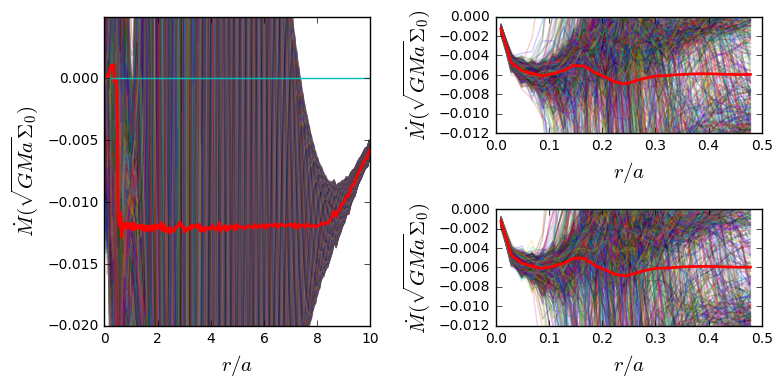

In [25]:
path = '/tigress/jiming/athena/bin/test_hst1d/debug_rst'
path = '/tigress/jiming/athena/bin/test_hst1d/debug_ghost'
path = '/tigress/jiming/athena/bin/test_hst1d/test_djdr'
path = '/tigress/jiming/athena/bin/test_hst1d/2d512'
path = '/tigress/jiming/athena/bin/test_hst1d/2d512.rst'
#path = '/tigress/jiming/athena/bin/test_hst1d/2d256'

time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape
nvar = 5
nt,nrcbd,nrcsd1,nrcsd2 = cbd.shape[0]//nvar,cbd.shape[1],csd1.shape[1],csd2.shape[1]
plot_mdot_3panel(cbd[1:-1:nvar,:],csd1[1:-1:nvar,:],csd2[1:-1:nvar,:]
                 ,rcbd[0:nrcbd],rcsd1[0:nrcsd1],rcsd2[0:nrcsd2])

int(dtdr)= -0.00932169
int(dtdr)= -0.00652885
int(dtdr)= -0.0065324


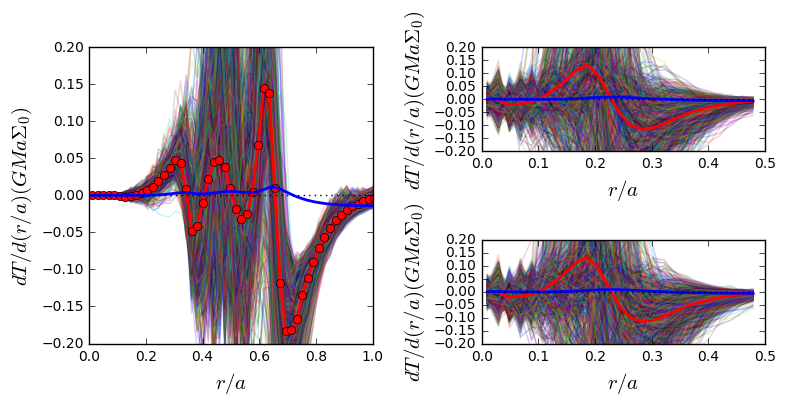

In [21]:
plot_torque(cbd[0:-1:nvar,:],csd1[0:-1:nvar,:],csd2[0:-1:nvar,:]
                 ,rcbd[0:nrcbd],rcsd1[0:nrcsd1],rcsd2[0:nrcsd2],
                  rcbd[nrcbd:],rcsd1[nrcsd1:],rcsd2[nrcsd2:],rmin=0,rmax=1,marker='o')

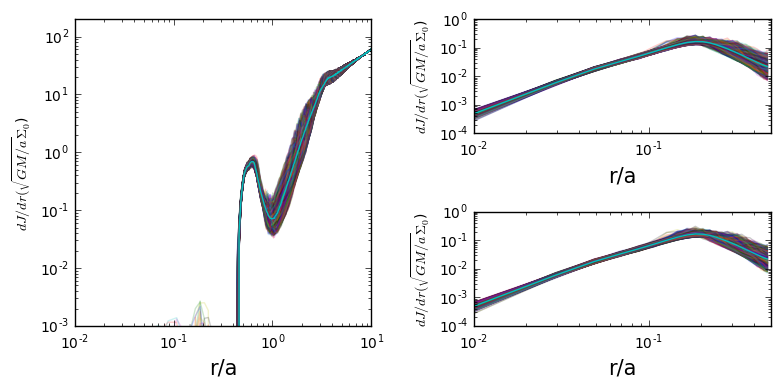

In [23]:
plot_dJdt(cbd[4:-1:nvar,:],csd1[4:-1:nvar,:],csd2[4:-1:nvar,:],
          rcbd[0:nrcbd],rcsd1[0:nrcsd1],rcsd2[0:nrcsd2],
          rcbd[nrcbd:],rcsd1[nrcsd1:],rcsd2[nrcsd2:],xscale='log')

95 4.96094
63 2.48047


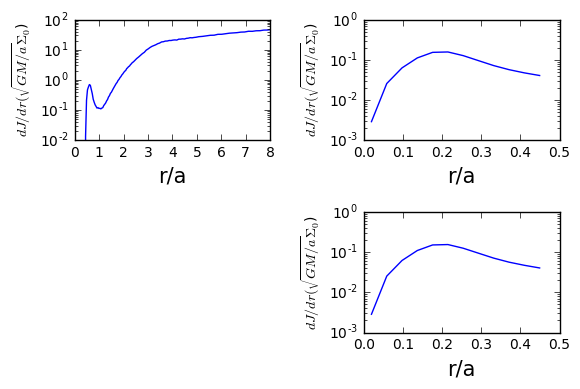

In [184]:
rlev1 = np.argmin(np.abs(rcbd[0:nrcbd]-5.0))
rlev2 = np.argmin(np.abs(rcbd[0:nrcbd]-2.5))

plt.subplot(2,2,1)
rjam = rcbd[0:nrcbd]
drjam = rcbd[nrcbd:]
print rlev1,rjam[rlev1]
print rlev2,rjam[rlev2]
jam = np.average(cbd[4:-1:5,:],axis=0)/drjam
# jam[rlev2+1:] /=2.0
# jam[rlev1+1:] /=2.0
plt.plot(rjam,jam)
plt.yscale('log')
plt.xlim([0,8])
plt.xlabel('r/a',fontsize=15)
plt.ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')

plt.subplot(2,2,2)
rjam = rcsd1[0:nrcsd1]
drjam = rcsd1[nrcsd1:]
jam = np.average(csd1[4:-1:5,:],axis=0)/drjam
plt.plot(rjam,jam)
plt.yscale('log')
plt.xlim([0,0.5])
plt.xlabel('r/a',fontsize=15)
plt.ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')

plt.subplot(2,2,4)
rjam = rcsd2[0:nrcsd2]
drjam = rcsd2[nrcsd2:]
jam = np.average(csd2[4:-1:5,:],axis=0)/drjam
plt.plot(rjam,jam)
plt.yscale('log')
plt.xlim([0,0.5])
plt.xlabel('r/a',fontsize=15)
plt.ylabel(r'$dJ/dr (\sqrt{GM/a}\Sigma_0$)')

plt.tight_layout()

(256,)
128
(23895, 128)


(0, 8)

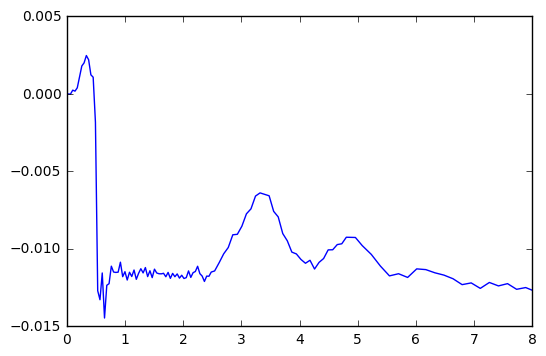

In [160]:
print rcbd.shape
print nrcbd
print cbd.shape

#plt.plot(rcbd[0:nrcbd],np.average(cbd[0:-1:nvar,:],axis=0))
plt.plot(rcbd[0:nrcbd],np.average(cbd[1:-1:nvar,:],axis=0))
plt.xlim([0,8])

In [112]:
path = '/tigress/jiming/athena/bin/test_hst1d/debug_vbinary2'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape

(24,) (31855, 12) (31855, 128) (256,)


(-0.2, 0.2)

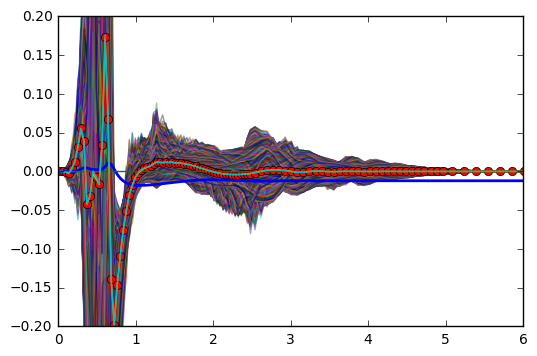

In [108]:
%matplotlib inline
from scipy import integrate
nvar=5
nt = cbd.shape[0]//nvar
nrcbd = cbd.shape[1]
for i in np.arange(0,nt):
  plt.plot(rcbd[0:nrcbd],cbd[nvar*i,:],alpha=0.4)

dtdr = np.average(cbd[0:-1:nvar,:],axis=0)#/rcbd[0:nrcbd]

dtdr_first_half = np.average(cbd[0:(nt/2)*nvar:5,:],axis=0)
dtdr_second_half = np.average(cbd[(nt/2)*nvar:-1:5,:],axis=0)

torq = integrate.cumtrapz(dtdr, rcbd[0:nrcbd], initial=0)
#torq = np.cumsum(dtdr*rcbd[32:])
plt.plot(rcbd[0:nrcbd],dtdr,'r-o',lw=2)
plt.plot(rcbd[0:nrcbd],torq,'b-',lw=2)
plt.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))
plt.plot(rcbd[0:nrcbd],dtdr_first_half,'y-',lw=1)
plt.plot(rcbd[0:nrcbd],dtdr_second_half,'c-',lw=1)

plt.xlim([0,6])
plt.ylim([-2e-1,2e-1])
#print torq

avg(mdot0)= -0.0120385


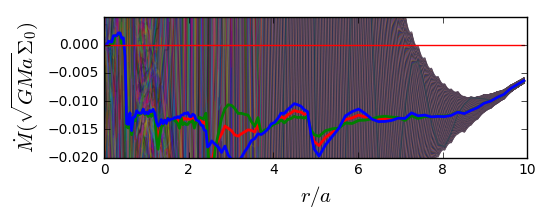

In [117]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12,8)) #(8, 4)) 
gs = gridspec.GridSpec(2, 2) 

# plot cbd mdot
ax0 = plt.subplot(gs[0:1,0])
nrcbd = cbd.shape[1]
for i in np.arange(0,nt/3):
  ax0.plot(rcbd[0:nrcbd],cbd[3*nvar*i+1,:],alpha=0.2)
mdot = np.average(cbd[1:-1:nvar,:],axis=0)
mdot1 = np.average(cbd[3000*nvar+1:-1:nvar,:],axis=0)
mdot2 = np.average(cbd[1:3000*nvar+2:nvar,:],axis=0)
ax0.plot(rcbd[0:nrcbd],mdot,'r-',lw=2)
ax0.plot(rcbd[0:nrcbd],mdot1,'g-',lw=2)
ax0.plot(rcbd[0:nrcbd],mdot2,'b-',lw=2)
ax0.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))
print "avg(mdot0)=",np.average(mdot)
#plt.xlim([0,6])
ax0.set_ylim([-2e-2,5e-3])
ax0.set_xlabel(r'$r / a$',fontsize=15)
ax0.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

# #plot csd1 mdot
# ax1 = plt.subplot(gs[0,1])
# nrcsd1 = csd1.shape[1]
# for i in np.arange(0,nt/3):
#   ax1.plot(rcsd1[0:nrcsd1],csd1[3*nvar*i+1,:],alpha=0.2)
# mdot = np.average(csd1[1:-1:nvar,:],axis=0)
# ax1.plot(rcsd1[0:nrcsd1],mdot,'r-',lw=2)
# ax1.plot(rcsd1[0:nrcsd1],np.full(nrcsd1,0.0))
# print "avg(mdot1)=",np.average(mdot)
# ax1.set_ylim([-1e-1,1e-1])
# ax1.set_xlabel(r'$r / a$',fontsize=15)
# ax1.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)


# #plot csd2 mdot
# ax2 = plt.subplot(gs[1,1])
# nrcsd2 = csd2.shape[1]
# for i in np.arange(0,nt/3):
#   ax2.plot(rcsd2[0:nrcsd1],csd2[3*nvar*i+1,:],alpha=0.2)
# mdot = np.average(csd2[1:-1:nvar,:],axis=0)
# ax2.plot(rcsd1[0:nrcsd2],mdot,'r-',lw=2)
# ax2.plot(rcsd1[0:nrcsd2],np.full(nrcsd2,0.0))
# print "avg(mdot2)=",np.average(mdot)
# #ax2.set_ylim([-1e-1,1e-1])
# ax2.set_ylim([-0.012,0])
# ax2.set_xlabel(r'$r / a$',fontsize=15)
# ax2.set_ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

# plt.tight_layout()


(31855, 128)


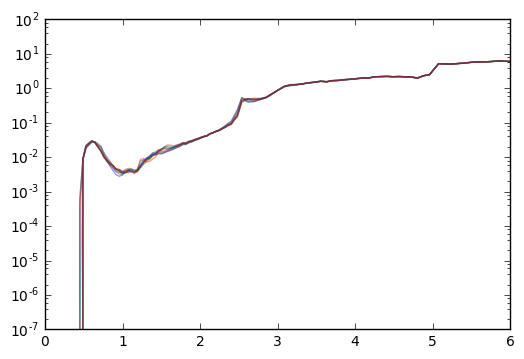

In [80]:
%matplotlib inline
from scipy import integrate
nvar=5
nt = cbd.shape[0]//nvar
print cbd.shape
nrcbd = cbd.shape[1]
for i in np.arange(0,10):
  plt.plot(rcbd[0:nrcbd],cbd[4+nvar*i,:],alpha=0.4)
# dtdr = np.average(cbd[4:-1:nvar,:],axis=0)
# torq = integrate.cumtrapz(dtdr, rcbd[0:nrcbd], initial=0)
# #torq = np.cumsum(dtdr*rcbd[32:])
# plt.plot(rcbd[0:nrcbd],dtdr,'r-o',lw=2)
# plt.plot(rcbd[0:nrcbd],torq,'b-',lw=2)
# plt.plot(rcbd[0:nrcbd],np.full(nrcbd,0.0))

plt.xlim([0,6])
plt.yscale('log')
#plt.ylim([-2e-1,2e-1])
#print torq

## 3D low resol  64^3 + 2 level 
* t=1100 -1256  about 25 binary orbits, 2486 samplings ==> 100 dumps per orbit for 25 orbits
* although the low resol, 32 grid points cover r=0-10.. the net torque is positive  $\sim 3.7\times 10^{-4} {GM}\rho a^2\simeq 1.9\times 10^{-3} GMa\Sigma_0$

In [290]:
path = '/tigress/jiming/athena/bin/test_hst1d/'
path = '/tigress/jiming/athena/bin/test_hst1d/3d'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape

(6,) (9944, 3) (9944, 32) (64,)


(9944, 32)
[ 0.          0.00039007  0.00374812  0.00656311  0.00193    -0.00589132
 -0.01001581 -0.00970063 -0.00645737 -0.00234573  0.00093342  0.00283188
  0.00333306  0.00276646  0.00143794  0.00013847 -0.00013436  0.00043677
  0.00040897  0.0003777   0.00038762  0.00037707  0.00037422  0.00037319
  0.00037342  0.00037336  0.00037275  0.00037257  0.00037259  0.00037269
  0.00037279  0.00037278]


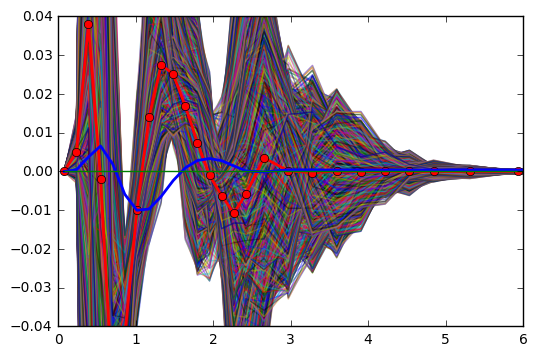

In [291]:
from scipy import integrate
print cbd.shape
# plt.plot(data1[0:32],data3[4,:])
# plt.plot(data1[0:32],data3[8,:])
# plt.plot(data1[0:32],data3[12,:])
for i in np.arange(0,2486):
  plt.plot(rcbd[0:32],cbd[4*i,:],alpha=0.4)
dtdr = np.average(cbd[0:9944:4,:],axis=0)
torq = integrate.cumtrapz(dtdr, rcbd[0:32], initial=0)
#torq = np.cumsum(dtdr*rcbd[32:])
plt.plot(rcbd[0:32],dtdr,'r-o',lw=2)
plt.plot(rcbd[0:32],torq,'b-',lw=2)
plt.plot(rcbd[0:32],np.full(32,0.0))

plt.xlim([0,6])
plt.ylim([-4e-2,4e-2])
print torq

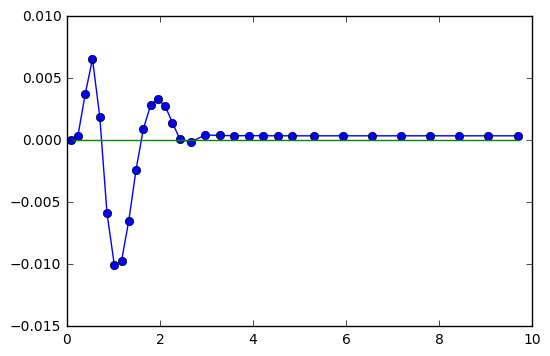

In [292]:
plt.plot(rcbd[0:32],torq,'-o')
plt.plot(rcbd[0:32],np.full(32,0.0))

## torque on 2D simulation:
* average over 3 orbits with 320 dumps between t=6000 and 6020 for test.
* now running both 2d and 3d , aim for the long term and avg over the last few tens orbits

In [120]:
path = '/tigress/jiming/athena/bin/test_hst1d/'
path = '/tigress/jiming/athena/bin/test_hst1d/2d.hole'
path = '/tigress/jiming/athena/bin/test_hst1d/2d.hires/tmp'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape

(50,) (19116, 25) (19116, 256) (512,)


## show the bin location and bin size of 256x256 and 512x512 runs

(256,)
(512,)
(50,)


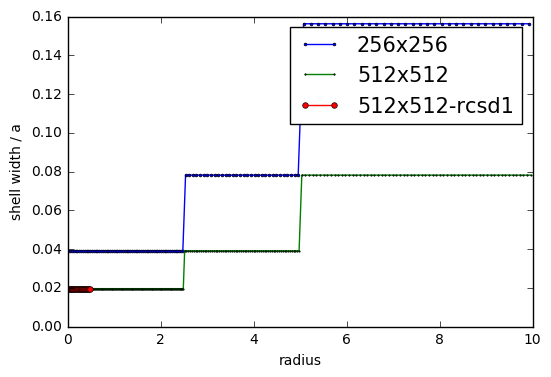

In [94]:
  # read radii
dtype = np.dtype("f4")
path = '/tigress/jiming/athena/bin/test_hst1d/2d/'
fname = path+'/rcbd.hst1d'
rcbd = np.fromfile(fname, dtype=dtype,count=-1)
print rcbd.shape
plt.plot(rcbd[0:128],rcbd[128:],'o-',markersize=2,label='256x256')

path = '/tigress/jiming/athena/bin/test_hst1d/2d.hires/tmp'
path = '/tigress/jiming/athena/bin/test_hst1d/debug_hires/'
fname = path+'/rcbd.hst1d'
rcbd = np.fromfile(fname, dtype=dtype,count=-1)
print rcbd.shape
plt.plot(rcbd[0:256],rcbd[256:],'o-',markersize=1,label='512x512')

path = '/tigress/jiming/athena/bin/test_hst1d/debug_hires/'
fname = path+'/rcsd1.hst1d'
rcbd = np.fromfile(fname, dtype=dtype,count=-1)
print rcbd.shape
plt.plot(rcbd[0:25],rcbd[25:],'o-',markersize=4,label='512x512-rcsd1')

plt.xlim([0,10])
plt.xlabel('radius',fontsize=10)
plt.ylabel('shell width / a',fontsize=10)
plt.legend(fontsize=15)

(19116, 256)


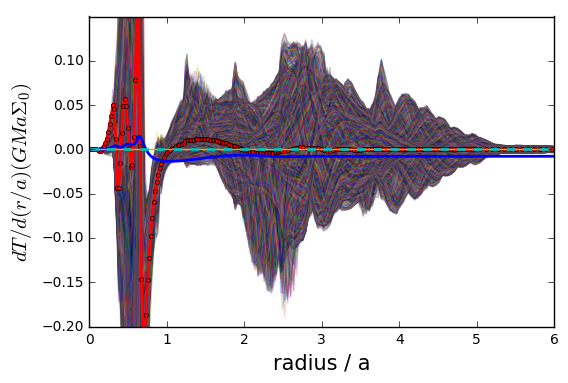

In [121]:
from scipy import integrate
print cbd.shape
# plt.plot(data1[0:32],data3[4,:])
# plt.plot(data1[0:32],data3[8,:])
# plt.plot(data1[0:32],data3[12,:])
nt = np.shape(cbd)[0]/4
ncbd = np.shape(cbd)[1]
ncsd1 = np.shape(csd1)[1]
ncsd2 = np.shape(csd2)[1]
for i in np.arange(0,nt):
  plt.plot(rcbd[0:ncbd],cbd[4*i,:],alpha=0.2)
dtdr = np.average(cbd[0:nt*2:4,:],axis=0)/rcbd[0:ncbd]
torq = integrate.cumtrapz(dtdr, rcbd[0:ncbd], initial=0)
torq = np.cumsum(dtdr*rcbd[ncbd:])
plt.plot(rcbd[0:ncbd],dtdr,'r-o',lw=2,markersize=3)
plt.plot(rcbd[0:ncbd],torq,'b-',lw=2)
plt.plot(rcbd[0:ncbd],np.full(ncbd,0.0))

dtdr = np.average(cbd[nt*2:4*nt:4,:],axis=0)/rcbd[0:ncbd]
plt.plot(rcbd[0:ncbd],dtdr,'c--',lw=2,markersize=3)

plt.xlim([0,6])
plt.ylim([-2e-1,1.5e-1])
plt.xlabel('radius / a',fontsize=15)
plt.ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)


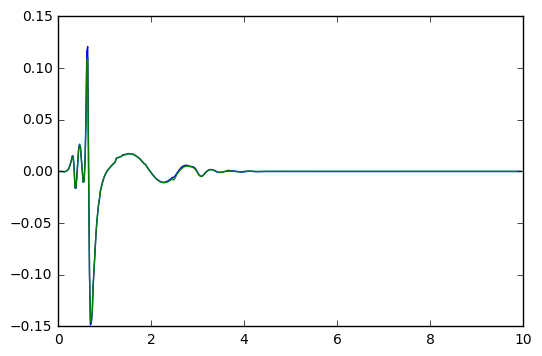

In [104]:
nt= cbd.shape[0]/4
dtdr1 =  np.average(cbd[0:2*nt:4,:],axis=0)
dtdr2 =  np.average(cbd[4*2389:4*nt:4,:],axis=0)
plt.plot(rcbd[0:ncbd],dtdr1)
plt.plot(rcbd[0:ncbd],dtdr2)

In [67]:
print cbd.shape
print 19116/4/2

(19116, 256)
2389


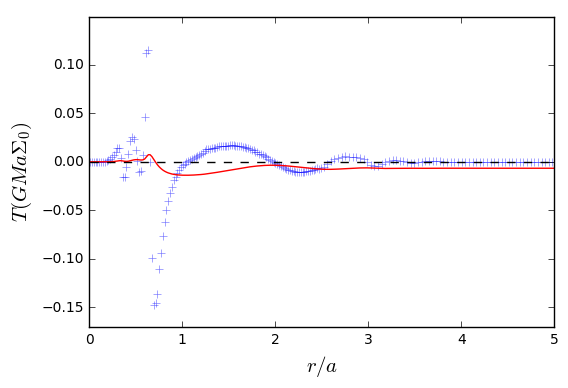

In [304]:
plt.plot(rcbd[0:ncbd],dtdr,'b+',markersize=6,alpha=0.5)
plt.plot(rcbd[0:ncbd],torq,'r-')
plt.plot(rcbd[0:ncbd],np.full(ncbd,0.0),'k--')
# dtdr1 = np.average(csd1[0:12748:4,:],axis=0)
# torq1 = integrate.cumtrapz(dtdr1, rcsd1[0:12], initial=0)
# dtdr2 = np.average(csd2[0:12748:4,:],axis=0)
# torq2 = integrate.cumtrapz(dtdr2, rcsd2[0:12], initial=0)
# plt.plot(rcsd1[0:12]+0.5,dtdr1,'g-')
# plt.plot(rcsd1[0:12]+0.5,torq1,'g--')
# plt.plot(rcsd2[0:12]+0.5,dtdr2,'r-')
# plt.plot(rcsd2[0:12]+0.5,torq2,'r--')
plt.xlim([0,5])
plt.ylim([-0.17,0.15])
plt.xlabel(r'$r / a$',fontsize=15)
plt.ylabel(r'$T (GMa\Sigma_0)$',fontsize=15)

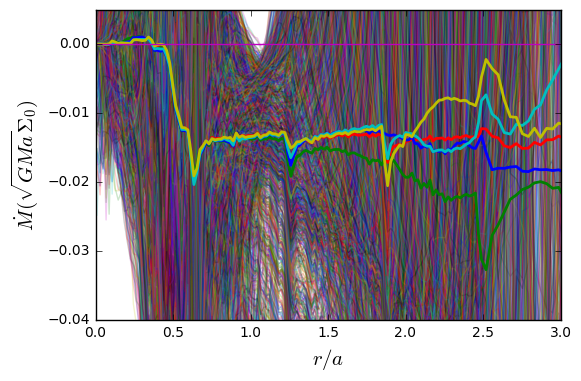

In [125]:
for i in np.arange(0,nt/3):
  plt.plot(rcbd[0:ncbd],cbd[12*i+1,:],alpha=0.2)
mdot = np.average(cbd[1:nt*4:4,:],axis=0)
mdot1 = np.average(cbd[1:1000*4:4,:],axis=0)
mdot2 = np.average(cbd[1+4000:4000*2:4,:],axis=0)
mdot3 = np.average(cbd[1+4000*2:4000*3:4,:],axis=0)
mdot4 = np.average(cbd[1+4000*3:4000*4:4,:],axis=0)
plt.plot(rcbd[0:ncbd],mdot,'r-',lw=2)
plt.plot(rcbd[0:ncbd],mdot1,'g-',lw=2)
plt.plot(rcbd[0:ncbd],mdot2,'b-',lw=2)
plt.plot(rcbd[0:ncbd],mdot3,'c-',lw=2)
plt.plot(rcbd[0:ncbd],mdot4,'y-',lw=2)
plt.plot(rcbd[0:ncbd],np.full(ncbd,0.0))

plt.xlim([0,3])
#plt.ylim([-1e-1,1e-1])
plt.ylim([-4e-2,5e-3])
plt.xlabel(r'$r / a$',fontsize=15)
plt.ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

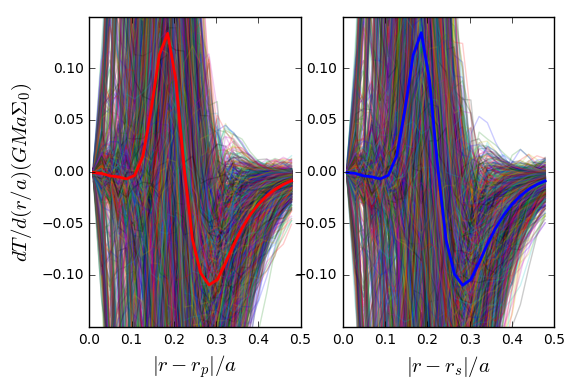

In [311]:
#csd data : need to correct the location where we calc the torq


ncsd1 = np.shape(csd1)[1]
ncsd2 = np.shape(csd2)[1]
plt.subplot(1, 2, 1)
for i in np.arange(0,nt/3):
  plt.plot(rcsd1[0:ncsd1],csd1[12*i,:],alpha=0.2)
plt.plot(rcsd1[0:ncsd1],np.average(csd1[0:nt*4:4,:],axis=0),'r-',lw=2)
plt.xlim([0,0.5])
plt.ylim([-0.15,0.15])
plt.xlabel(r'$|r-r_p| / a$',fontsize=15)
plt.ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)

plt.subplot(1,2,2)
for i in np.arange(0,nt/3):
  plt.plot(rcsd2[0:ncsd2],csd2[12*i,:],alpha=0.2)
plt.plot(rcsd2[0:ncsd2],np.average(csd2[0:nt*4:4,:],axis=0),'b-',lw=2)
plt.xlim([0,0.5])
plt.ylim([-0.15,0.15])
plt.xlabel(r'$|r-r_s| / a$',fontsize=15)
#plt.ylabel(r'$dT/d(r/a) (GMa\Sigma_0)$',fontsize=15)


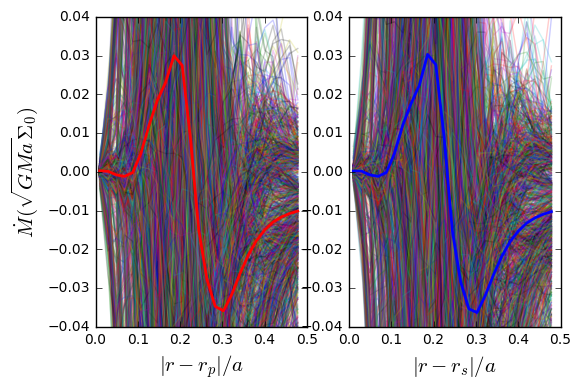

In [314]:
# mdot
plt.subplot(1, 2, 1)
for i in np.arange(0,nt/3):
  plt.plot(rcsd1[0:ncsd1],csd1[12*i+1,:],alpha=0.2)
plt.plot(rcsd1[0:ncsd1],np.average(csd1[1:nt*4:4,:],axis=0),'r-',lw=2)
plt.xlim([0,0.5])
plt.ylim([-0.04,0.04])
plt.xlabel(r'$|r-r_p| / a$',fontsize=15)
plt.ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

plt.subplot(1,2,2)
for i in np.arange(0,nt/3):
  plt.plot(rcsd2[0:ncsd2],csd2[12*i+1,:],alpha=0.2)
plt.plot(rcsd2[0:ncsd2],np.average(csd2[1:nt*4:4,:],axis=0),'b-',lw=2)
plt.xlim([0,0.5])
plt.ylim([-0.04,0.04])
plt.xlabel(r'$|r-r_s| / a$',fontsize=15)
#plt.ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)


# different sink

In [126]:
path = '/tigress/jiming/athena/bin/test_hst1d/2d.nohole'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape

(24,) (12748, 12) (12748, 128) (256,)


(12748, 128)


(-0.2, 0.1)

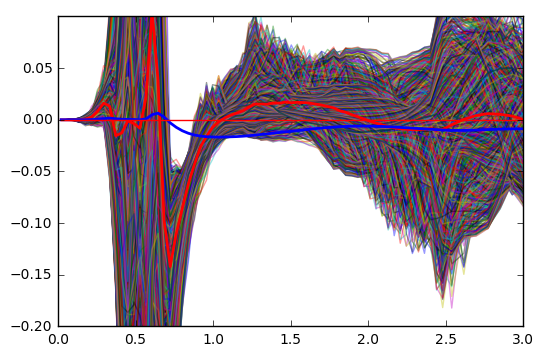

In [130]:
from scipy import integrate
print cbd.shape
# plt.plot(data1[0:32],data3[4,:])
# plt.plot(data1[0:32],data3[8,:])
# plt.plot(data1[0:32],data3[12,:])
for i in np.arange(0,3187):
  plt.plot(rcbd[0:128],cbd[4*i,:],alpha=0.4)
dtdr = np.average(cbd[0:12748:4,:],axis=0)
torq = integrate.cumtrapz(dtdr, rcbd[0:128], initial=0)
torq = np.cumsum(dtdr*rcbd[128:])
plt.plot(rcbd[0:128],dtdr,'r-',lw=2)
plt.plot(rcbd[0:128],torq,'b-',lw=2)
plt.plot(rcbd[0:128],np.full(128,0.0))

plt.xlim([0,3])
plt.ylim([-2e-1,1e-1])

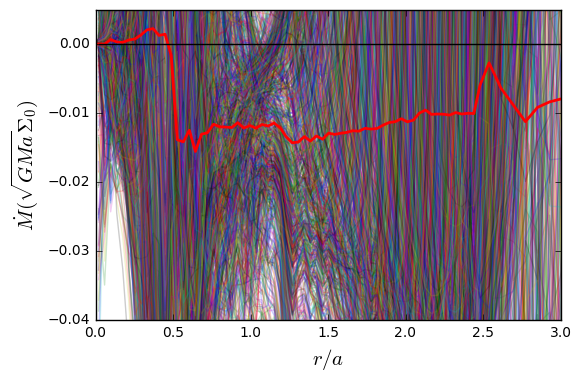

In [129]:
ncbd=128; nt=3000
for i in np.arange(0,nt/3):
  plt.plot(rcbd[0:ncbd],cbd[12*i+1,:],alpha=0.2)
mdot = np.average(cbd[1:nt*4:4,:],axis=0)
plt.plot(rcbd[0:ncbd],mdot,'r-',lw=2)
plt.plot(rcbd[0:ncbd],np.full(ncbd,0.0))

plt.xlim([0,3])
#plt.ylim([-1e-1,1e-1])
plt.ylim([-4e-2,5e-3])
plt.xlabel(r'$r / a$',fontsize=15)
plt.ylabel(r'$\dot M (\sqrt{GMa}\Sigma_0)$',fontsize=15)

## different time span

In [228]:
path = '/tigress/jiming/athena/bin/test_hst1d/2d.hole/tmp/'
time,rcbd,rcsd1,rcsd2,cbd,csd1,csd2 = read_hist1d_binary(path)
print rcsd1.shape, csd1.shape, cbd.shape,rcbd.shape
print time[-1:]

(24,) (12744, 12) (12744, 128) (256,)
[ 800.]


(12744, 128)


(-0.2, 0.1)

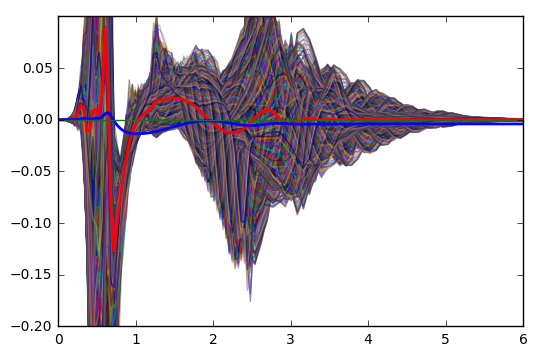

In [227]:
from scipy import integrate
print cbd.shape
# plt.plot(data1[0:32],data3[4,:])
# plt.plot(data1[0:32],data3[8,:])
# plt.plot(data1[0:32],data3[12,:])
for i in np.arange(0,3186):
  plt.plot(rcbd[0:128],cbd[4*i,:],alpha=0.4)
dtdr = np.average(cbd[0:12744:4,:],axis=0)
torq = integrate.cumtrapz(dtdr, rcbd[0:128], initial=0)
torq = np.cumsum(dtdr*rcbd[128:])
plt.plot(rcbd[0:128],dtdr,'r-',lw=2)
plt.plot(rcbd[0:128],torq,'b-',lw=2)
plt.plot(rcbd[0:128],np.full(128,0.0))

plt.xlim([0,6])
plt.ylim([-2e-1,1e-1])


# ------------------ SCRATCH NOTES ------------------------

## show the accretion rate of various h/r runs

(0.001, 0.002)

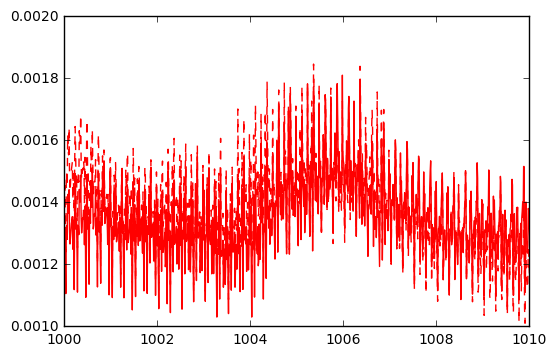

In [13]:
# test the preferential accretion rate 
from read_hist import read_hist1d_mdot
from savgol import savitzky_golay as sg
%matplotlib inline


direname='/tigress/jiming/athena/bin/hor/'
targlist=['h0.2','h0.07','h0.05']
clist = ['k','b','r']
basename='cbd.out1.'
appdname='athdf'
histname='cbd.hst'

omg=1.0
torb=2.*np.pi/omg
dt = 0.0628 # 0.01*torb
plt.subplot(111)

count=0
for targ in targlist:
  fname=direname+targ+'/'+histname
  tt,mdot1,mdot2 = read_hist1d_mdot(fname)
#mdot1 = np.gradient(mdot1[::1])/dt
#mdot2 = np.gradient(mdot2[::1])/dt
  mdot1 = np.gradient(mdot1,dt)
  mdot2 = np.gradient(mdot2,dt)
  #print np.max(mdot1),np.max(mdot2)
  plt.plot(tt/torb,mdot1,clist[count]+'-',label=targ+' '+r'$\dot{M}_1$')
  plt.plot(tt/torb,mdot2,clist[count]+'--',label=targ+' '+r'$\dot{M}_2$')
  count += 1
plt.xlim([1000,1010])
plt.ylim([1e-3,2e-3])
#size=int(len(mdot1)*0.5)
# print size
# print 
# print '<mdot1> = ',np.average(mdot1[size:])
# print '<mdot2> = ',np.average(mdot2[size:])

(-0.2, 1.2)

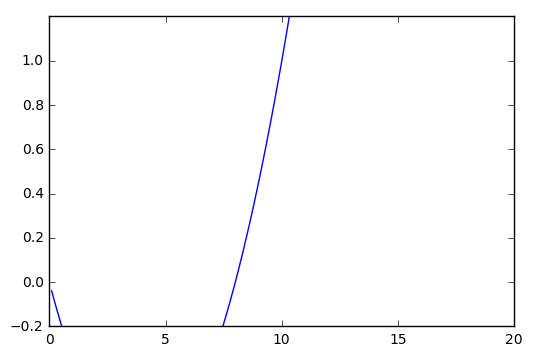

In [29]:
# test ramp up function
x=np.linspace(0.1,20,100)
r1 = 8.; r2=10.
a = 1./(r2**2-r1*r2)
b = -a*r1
c = 0.
ramp = a*x**2+b*x+c
plt.plot(x,ramp)
#plt.xlim([r1,r2])
plt.ylim([-0.2,1.2])

<IPython.core.display.Javascript object>


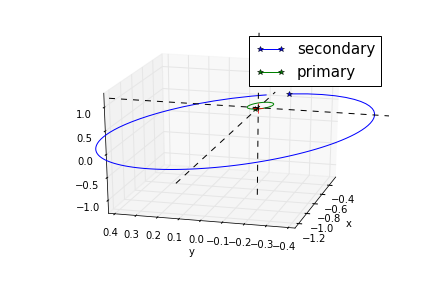

In [7]:
from plot_binary_orbit import plot_binary_orbit as pltbinary
%matplotlib notebook

direname = '/tigress/jiming/athena/bin/binary/'
targname = 'orbit'
histname = 'binary_orbit.tab'
fname=direname+targname+'/'+histname
pltbinary(fname)

## plot azimuthal quantities

/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:96: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


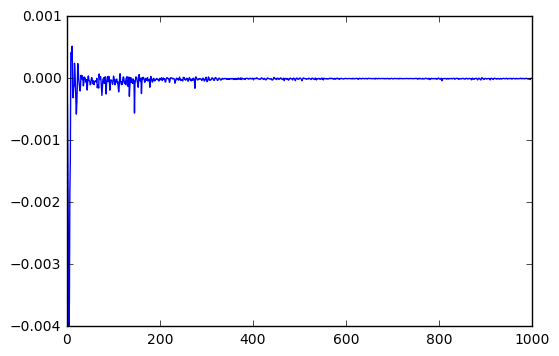

In [99]:
import pdb
def radial_data(data,annulus_width=1,working_mask=None,x=None,y=None,rmax=None):
    """
    r = radial_data(data,annulus_width,working_mask,x,y)
    
    A function to reduce an image to a radial cross-section.
    
    :INPUT:
      data   - whatever data you are radially averaging.  Data is
              binned into a series of annuli of width 'annulus_width'
              pixels.

      annulus_width - width of each annulus.  Default is 1.

      working_mask - array of same size as 'data', with zeros at
                        whichever 'data' points you don't want included
                        in the radial data computations.

      x,y - coordinate system in which the data exists (used to set
               the center of the data).  By default, these are set to
               integer meshgrids

      rmax -- maximum radial value over which to compute statistics
    
    :OUTPUT:
        r - a data structure containing the following
                   statistics, computed across each annulus:

          .r      - the radial coordinate used (outer edge of annulus)

          .mean   - mean of the data in the annulus

          .sum    - the sum of all enclosed values at the given radius

          .std    - standard deviation of the data in the annulus

          .median - median value in the annulus

          .max    - maximum value in the annulus

          .min    - minimum value in the annulus

          .numel  - number of elements in the annulus

    :EXAMPLE:        
      ::
        
        import numpy as np
        import pylab as py
        import radial_data as rad

        # Create coordinate grid
        npix = 50.
        x = np.arange(npix) - npix/2.
        xx, yy = np.meshgrid(x, x)
        r = np.sqrt(xx**2 + yy**2)
        fake_psf = np.exp(-(r/5.)**2)
        noise = 0.1 * np.random.normal(0, 1, r.size).reshape(r.shape)
        simulation = fake_psf + noise

        rad_stats = rad.radial_data(simulation, x=xx, y=yy)

        py.figure()
        py.plot(rad_stats.r, rad_stats.mean / rad_stats.std)
        py.xlabel('Radial coordinate')
        py.ylabel('Signal to Noise')
    """
    
# 2012-02-25 20:40 IJMC: Empty bins now have numel=0, not nan.
# 2012-02-04 17:41 IJMC: Added "SUM" flag
# 2010-11-19 16:36 IJC: Updated documentation for Sphinx
# 2010-03-10 19:22 IJC: Ported to python from Matlab
# 2005/12/19 Added 'working_region' option (IJC)
# 2005/12/15 Switched order of outputs (IJC)
# 2005/12/12 IJC: Removed decifact, changed name, wrote comments.
# 2005/11/04 by Ian Crossfield at the Jet Propulsion Laboratory
 
    import numpy as ny

    class radialDat:
        """Empty object container.
        """
        def __init__(self): 
            self.mean = None
            self.r = None

    #---------------------
    # Set up input parameters
    #---------------------
    data = ny.array(data)
    
    if working_mask==None:
        working_mask = ny.ones(data.shape,bool)
    
    npix, npiy = data.shape
    if x==None or y==None:
        x1 = ny.arange(-npix/2.,npix/2.)
        y1 = ny.arange(-npiy/2.,npiy/2.)
        x,y = ny.meshgrid(y1,x1)

    r = abs(x+1j*y)

    if rmax==None:
        rmax = r[working_mask].max()

    #---------------------
    # Prepare the data container
    #---------------------
    dr = ny.abs([x[0,0] - x[0,1]]) * annulus_width
    radial = ny.arange(rmax/dr)*dr + dr/2.
    nrad = len(radial)
    radialdata = radialDat()
    radialdata.mean = ny.zeros(nrad)
    radialdata.r = radial
    
    #---------------------
    # Loop through the bins
    #---------------------
    for irad in range(nrad): #= 1:numel(radial)
      minrad = irad*dr
      maxrad = minrad + dr
      thisindex = (r>=minrad) * (r<maxrad) * working_mask
      #import pylab as py
      #pdb.set_trace()
      if not thisindex.ravel().any():
        radialdata.mean[irad] = ny.nan
      else:
        radialdata.mean[irad] = data[thisindex].mean()
    
    #---------------------
    # Return with data
    #---------------------
    
    return radialdata

direname = '/tigress/jiming/athena/bin/binary/'
targname = 'alpha=0'
histname = 'binary_orbit.tab'
dataname = 'cbd.out1.'

first_time= 1
mdot0 = np.zeros(1001)
for i in np.arange(0,1001):
   fname=direname+targname+'/'+dataname+str(i).zfill(5)+'.athdf'
   time,data = myath.athdf(fname,level=2,subsample=True)

   if first_time:
     dx = dy = data['x1f'][1]-data['x1f'][0] 
     x1 = data['x1f']+0.5*dx
     x2 = data['x2f']+0.5*dx
     x1 = x1[:-1]; x2 = x2[:-1]
    
     first_time=0
   
   def remove_extra(datain,x1,x2,rout):
        mask_x2 = np.abs(x2)<rout;
        mask_x1 = np.abs(x1)<rout;
        dataout = datain[0,mask_x2,:]
        dataout = dataout[:,mask_x1]
        x1out = x1[mask_x1];x2out = x2[mask_x2]
        return x1out,x2out,dataout
   
   rout = 4
   xx,yy,den = remove_extra(data['dens'],x1,x2,rout)
   xx,yy,vx = remove_extra(data['mom1']/data['dens'],x1,x2,rout)
   xx,yy,vy = remove_extra(data['mom2']/data['dens'],x1,x2,rout)
   xx,yy,vy = remove_extra(data['mom2']/data['dens'],x1,x2,rout)
   xx,yy = np.meshgrid(xx,yy)
   phi = np.arctan2(yy,xx)   
   vr  = vx*np.cos(phi)+vy*np.sin(phi) 
   #vphi = -vx*np.sin(phi)+vy*np.cos(phi)
   rad_stats = radial_data(den*vr,x=xx,y=yy)
   tmp = rad_stats.mean[rad_stats.r >= 1.0]
   mdot0[i] = tmp[0]
   #plt.plot(rad_stats.r,rad_stats.mean)

plt.plot(mdot0)

# plt.plot(den)
# #plt.plot(dvr)

-0.000316682802776 -3.71909586944e-06


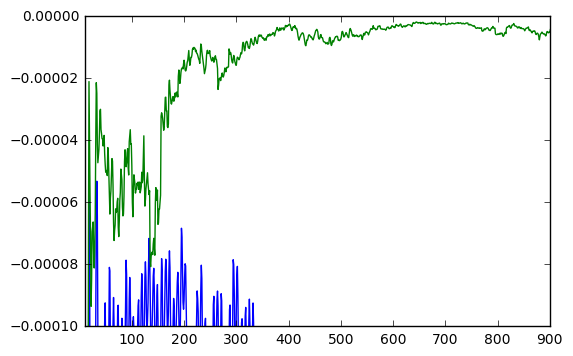

In [103]:
def smooth_boxcar(signal,hwidth=0):
  if hwidth==0:
    return signal
  else:
    output = np.zeros(signal.shape)
    output += signal
    for i in np.arange(hwidth):
      output += np.roll(signal,-i-1)
      output += np.roll(signal,i+1)
    output /= (hwidth*2.0+1.0)
    output[0:hwidth]=signal[0:hwidth]
    output[-hwidth:]=signal[-hwidth:]
    return output
plt.plot(smooth_boxcar(mdot,10))
plt.plot(smooth_boxcar(mdot0,10))
plt.xlim([10,900])
plt.ylim([-0.0001,0.0])
print np.average(mdot[500:]), np.average(mdot0[500:])

In [119]:
import cPickle as pickle
#pickle.dump(mdot, open('mdot_q=0.5.dat', "wb" ),2)

#pickle.dump(mdot0, open('mdot_alpha=0.dat', "wb" ),2)

pickle.dump([avg_den,avg_vx,avg_vy], open('comoving.dat', "wb" ),2)

(502, 820) (580, 820) (580, 820)
(502,) (580,)


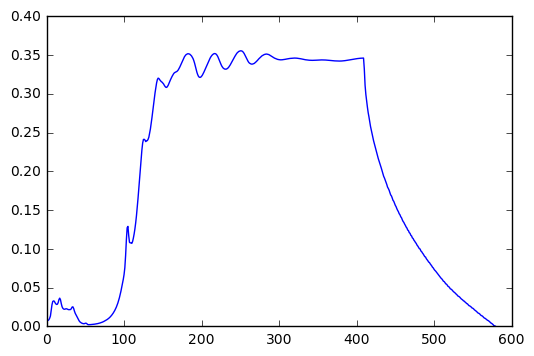

In [73]:
import abel
# 1. first get time averaged snapshot

direname = '/tigress/jiming/athena/bin/binary/'
targname = 'q=0.5'
histname = 'binary_orbit.tab'
dataname = 'cbd.out1.'

def polar_shift(time,data,rout):
     dx = dy = data['x1f'][1]-data['x1f'][0] 
     x1 = data['x1f']+0.5*dx
     x2 = data['x2f']+0.5*dx
     x1 = x1[:-1]; x2 = x2[:-1]
     # first remove data at larger radii
     def remove_extra(datain,x1,x2,rout):
        mask_x2 = np.abs(x2)<rout;
        mask_x1 = np.abs(x1)<rout;
        dataout = datain[0,mask_x2,:]
        dataout = dataout[:,mask_x1]
        x1out = x1[mask_x1];x2out = x2[mask_x2]
        return x1out,x2out,dataout
     xx,yy,den = remove_extra(data['dens'],x1,x2,rout)
     xx,yy,vx = remove_extra(data['mom1']/data['dens'],x1,x2,rout)
     xx,yy,vy = remove_extra(data['mom2']/data['dens'],x1,x2,rout)
    
     #need a meshgrid xx,yy and then calc phi, and then get vr, and then project to polar....ahyaya
     xgrid,ygrid=np.meshgrid(xx,yy)
     phi = np.arctan2(ygrid,xgrid)
     vr  = vx*np.cos(phi)+vy*np.sin(phi) 
     vphi = -vx*np.sin(phi)+vy*np.cos(phi)
     # we then project them into r-theta plane
     den, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(den) 
     vr,  r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(vr) 
     vphi,  r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(vr) 
     # then return azimuthal averaged quantities 
     print r_grid.shape,den.shape,vr.shape
     return r_grid[:,0],np.average(den,axis=1),np.average(den*vr,axis=1)

for i in np.arange(801,802):
  fname=direname+targname+'/'+dataname+str(i).zfill(5)+'.athdf'
  time,data = myath.athdf(fname,level=2,subsample=True)

  rr,den,dvr = polar_azimuth(time,data,8.0)
print rr.shape, den.shape

plt.plot(den)
#plt.plot(dvr)
#plt.subplot(1,2,2)
#plt.imshow(den2)
# PolarImage, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(den2) 
# plt.imshow(PolarImage, aspect='auto', origin='lower', 
#               extent=(np.min(theta_grid), np.max(theta_grid), np.min(r_grid), np.max(r_grid)))

## streamlines for time averaged velocity field in binary's co-orbital region

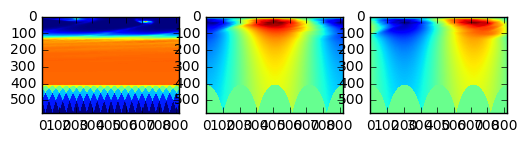

In [116]:
import abel
# 1. first get time averaged snapshot

direname = '/tigress/jiming/athena/bin/binary/'
targname = 'q=0.5'
histname = 'binary_orbit.tab'
dataname = 'cbd.out1.'

def shift_comoving(time,data,rout):
     dx = dy = data['x1f'][1]-data['x1f'][0] 
     x1 = data['x1f']+0.5*dx
     x2 = data['x2f']+0.5*dx
     x1 = x1[:-1]; x2 = x2[:-1]
     # first remove data at larger radii
     def remove_extra(datain,x1,x2,rout):
        mask_x2 = np.abs(x2)<rout;
        mask_x1 = np.abs(x1)<rout;
        dataout = datain[0,mask_x2,:]
        dataout = dataout[:,mask_x1]
        x1out = x1[mask_x1];x2out = x2[mask_x2]
        return x1out,x2out,dataout
     xx,yy,den = remove_extra(data['dens'],x1,x2,rout)
     xx,yy,vx = remove_extra(data['mom1']/data['dens'],x1,x2,rout)
     xx,yy,vy = remove_extra(data['mom2']/data['dens'],x1,x2,rout)
     # we then project them into r-theta plane
     den, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(den) 
     vx,  r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(vx) 
     vy,  r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(vy) 
     # then we shift them in phi according to their time
     tres = time%(2.0*np.pi)
     shift_amount = int(tres/(2.0*np.pi)*den.shape[1])
     den = np.roll(den,-shift_amount,axis=1)
     return r_grid,theta_grid,den,vx,vy

avg_den=0
avg_vx=0
avg_vy=0
for i in np.arange(800,901):
  fname=direname+targname+'/'+dataname+str(i).zfill(5)+'.athdf'
  time,data = myath.athdf(fname,level=2,subsample=True)
  xx,yy,den,vx,vy = shift_comoving(time,data,8.0)
  avg_den +=den;avg_vx+=vx;avg_vy+=vy;

avg_den /=100.;avg_vx /=100.;avg_vy/=100

plt.subplot(1,3,1)
plt.imshow(avg_den)
plt.subplot(1,3,2)
plt.imshow(avg_vx)
plt.subplot(1,3,3)
plt.imshow(avg_vy)
# PolarImage, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(den2) 
# plt.imshow(PolarImage, aspect='auto', origin='lower', 
#               extent=(np.min(theta_grid), np.max(theta_grid), np.min(r_grid), np.max(r_grid)))

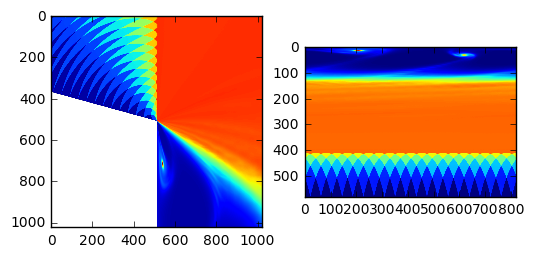

In [137]:
# now we have to reproject it back to cartesian coord

# Auxiliary function to map polar data to a cartesian plane
def polar_to_cart(polar_data, theta_step, range_step, x, y, order=3):

    from scipy.ndimage.interpolation import map_coordinates as mp

    # "x" and "y" are numpy arrays with the desired cartesian coordinates
    # we make a meshgrid with them
    X, Y = np.meshgrid(x, y)

    # Now that we have the X and Y coordinates of each point in the output plane
    # we can calculate their corresponding theta and range
    Tc = np.degrees(np.arctan2(Y, X)).ravel()
    Rc = (np.sqrt(X**2 + Y**2)).ravel()

    # Negative angles are corrected
    Tc[Tc < 0] = 360 + Tc[Tc < 0]

    # Using the known theta and range steps, the coordinates are mapped to
    # those of the data grid
    Tc = Tc / theta_step
    Rc = Rc / range_step

    # An array of polar coordinates is created stacking the previous arrays
    coords = np.vstack((Tc, Rc))

    # To avoid holes in the 360º - 0º boundary, the last column of the data
    # copied in the begining
    polar_data = np.vstack((polar_data, polar_data[-1,:]))

    # The data is mapped to the new coordinates
    # Values outside range are substituted with nans
    cart_data = mp(polar_data, coords, order=order, mode='constant', cval=np.nan)

    # The data is reshaped and returned
    return(cart_data.reshape(len(y), len(x)).T)

polar_data = avg_den # Here a 2D array of data is assumed, with shape thetas x ranges

# We create the x and y axes of the output cartesian data
x = y = np.linspace(-8, 8,num=1024,endpoint=True) 

# We call the mapping function assuming 1 degree of theta step and 500 meters of
# range step. The default order of 3 is used.
rstep = 8.0/502;tstep = 360.0/820

cart_data = polar_to_cart(polar_data, tstep,rstep, x, y)
plt.subplot(1,2,1)
plt.imshow(cart_data)
plt.subplot(1,2,2)
plt.imshow(avg_den)

In [143]:
import scipy as S
import scipy.ndimage

def deproject(datain):
    temperature = datain
    # This is the data in your polar grid.
    # The 0th and 1st axes correspond to r and ?, respectively.
    # For the sake of simplicity, ? goes from 0 to 2?, 
    # and r's units are just its indices.

    def polar2cartesian(outcoords, inputshape, origin):
        """Coordinate transform for converting a polar array to Cartesian coordinates. 
        inputshape is a tuple containing the shape of the polar array. origin is a
        tuple containing the x and y indices of where the origin should be in the
        output array."""

        xindex, yindex = outcoords
        x0, y0 = origin
        x = xindex - x0
        y = yindex - y0

        r = np.sqrt(x**2 + y**2)
        theta = np.arctan2(y, x)
        theta_index = np.round((theta + np.pi) * inputshape[1] / (2 * np.pi))

        return (r,theta_index)

    temperature_cartesian = S.ndimage.geometric_transform(temperature, polar2cartesian, order=0,\
                            output_shape = (temperature.shape[0] * 2, temperature.shape[0] * 2),\
                            extra_keywords = {'inputshape':temperature.shape, 'origin':(temperature.shape[0], \
                                                                                        temperature.shape[0])})
    return temperature_cartesian
    #plt.imshow(temperature_cartesian)

In [144]:
den_cart = deproject(avg_den)
vx_cart = deproject(avg_vx)
vy_cart = deproject(avg_vy)

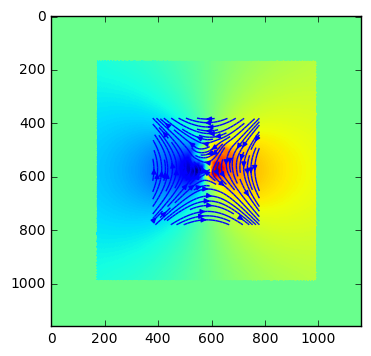

In [154]:
plt.streamplot(np.arange(380,780),np.arange(380,780),(vx_cart[380:780,380:780]),(vy_cart[380:780,380:780]),density=[1,1])
# plt.xlim([-0.5,0.5])
# plt.ylim([-0.025,0.025])
plt.imshow(vy_cart)



(100, 100)
(1, 1024, 1024)


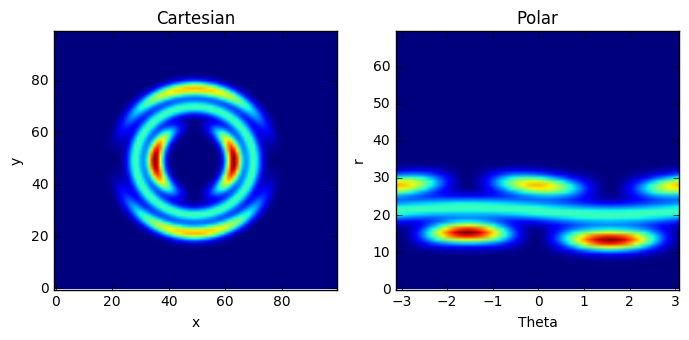

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# import abel

# CartImage = abel.tools.analytical.sample_image(501)[201:-200, 201:-200]
# print np.shape(CartImage)
# PolarImage, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(CartImage)
# print np.shape(data['dens'])
# fig, axs = plt.subplots(1,2, figsize=(7,3.5))
# axs[0].imshow(CartImage , aspect='auto', origin='lower')
# axs[1].imshow(PolarImage, aspect='auto', origin='lower', 
#               extent=(np.min(theta_grid), np.max(theta_grid), np.min(r_grid), np.max(r_grid)))

# axs[0].set_title('Cartesian')
# axs[0].set_xlabel('x')
# axs[0].set_ylabel('y')

# axs[1].set_title('Polar')
# axs[1].set_xlabel('Theta')
# axs[1].set_ylabel('r')

# plt.tight_layout()
# plt.show()

In [110]:
print 13.1%3.0

1.1


In [19]:
rout=4
den = data['dens'][0,np.abs(x2)<rout,np.abs(x1)<rout]

In [127]:
r_grid.shape

(502, 820)

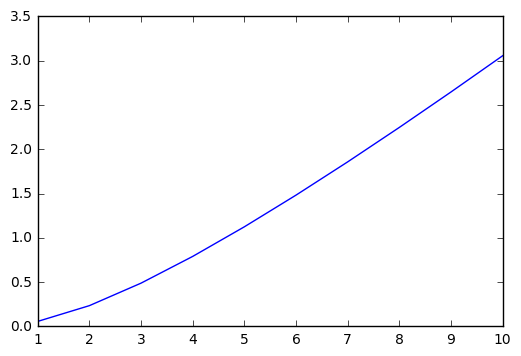

In [51]:
eps = np.arange(1,11)
pq = (eps*(2.+eps)-2.*(1+eps)*np.log(1.+eps))/2./(1.+eps)
plt.plot(eps,pq)

In [55]:
xgrid,ygrid=np.meshgrid(xx,yy)
xgrid.shape

(820, 820)

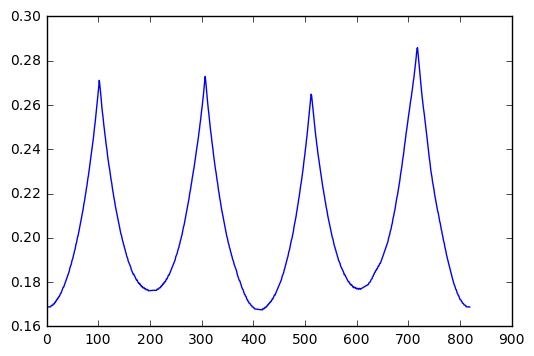

In [69]:
plt.plot(den)

In [67]:
rr

array([   0.        ,    1.00038881,    2.00077761,    3.00116642,
          4.00155523,    5.00194404,    6.00233284,    7.00272165,
          8.00311046,    9.00349926,   10.00388807,   11.00427688,
         12.00466569,   13.00505449,   14.0054433 ,   15.00583211,
         16.00622091,   17.00660972,   18.00699853,   19.00738734,
         20.00777614,   21.00816495,   22.00855376,   23.00894256,
         24.00933137,   25.00972018,   26.01010899,   27.01049779,
         28.0108866 ,   29.01127541,   30.01166421,   31.01205302,
         32.01244183,   33.01283064,   34.01321944,   35.01360825,
         36.01399706,   37.01438586,   38.01477467,   39.01516348,
         40.01555229,   41.01594109,   42.0163299 ,   43.01671871,
         44.01710751,   45.01749632,   46.01788513,   47.01827394,
         48.01866274,   49.01905155,   50.01944036,   51.01982916,
         52.02021797,   53.02060678,   54.02099559,   55.02138439,
         56.0217732 ,   57.02216201,   58.02255081,   59.02293